# 9. Neural Networks with MNIST

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torch.nn.init
from torch.autograd import Variable

import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 9.1 Prepare MNIST Data

In [3]:
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [4]:
mnist_train.train_data.size(), mnist_test.test_data.size()

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

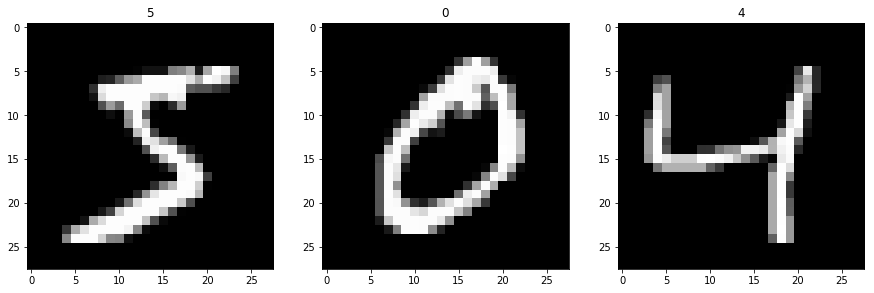

In [5]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title(mnist_train.train_labels[0])
ax1.imshow(mnist_train.train_data[0,:,:].numpy(), cmap='gray')

ax2.set_title(mnist_train.train_labels[1])
ax2.imshow(mnist_train.train_data[1,:,:].numpy(), cmap='gray')

ax3.set_title(mnist_train.train_labels[2])
ax3.imshow(mnist_train.train_data[2,:,:].numpy(), cmap='gray')

## 9.2 Make Batch Loader

In [6]:
batch_size = 100

data_loader  = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)

# dataset (Dataset) – dataset from which to load the data.
# batch_size (int, optional) – how many samples per batch to load (default: 1).
# shuffle (bool, optional) – set to True to have the data reshuffled at every epoch (default: False).
# num_workers (int, optional) – how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process. (default: 0)

In [7]:
for i in range(3) :
    batch_images, batch_labels = next(iter(data_loader))
    print(batch_labels.numpy(), ", ", len(batch_labels.numpy()))

[8 0 8 9 7 7 6 2 9 9 1 5 8 6 9 6 5 9 3 8 7 9 3 9 2 4 9 3 8 4 0 8 5 3 7 5 6
 5 4 8 2 1 7 2 5 0 3 3 3 0 2 3 0 8 5 2 8 6 4 8 4 2 4 5 6 1 5 1 4 7 7 8 1 9
 3 0 9 0 4 5 7 2 1 6 3 7 3 4 8 2 1 6 4 0 6 1 6 2 1 1] ,  100
[3 9 1 5 7 4 9 8 8 3 0 1 4 5 6 6 7 1 0 8 1 8 6 9 4 1 5 5 0 9 9 7 7 6 1 2 8
 0 7 9 4 1 2 9 7 4 3 1 8 4 9 1 1 6 9 8 6 9 5 0 1 6 4 5 8 6 1 9 3 8 5 0 5 2
 7 5 2 8 1 9 2 7 5 0 8 6 9 1 8 2 3 3 2 2 8 3 7 3 3 1] ,  100
[7 1 6 2 5 9 9 2 8 7 2 8 1 3 7 5 6 1 8 1 5 5 5 9 0 3 0 4 7 8 6 3 5 5 5 6 6
 8 8 9 3 6 4 6 6 4 5 1 7 6 8 9 1 7 6 4 4 6 0 6 6 7 2 1 9 6 1 8 8 7 6 6 3 6
 9 0 2 5 3 9 7 8 4 2 4 9 3 9 5 4 3 5 5 0 8 1 4 1 2 0] ,  100


## 9.3 Define Model

In [8]:
linear1 = torch.nn.Linear(784, 512, bias = True)
relu = torch.nn.ReLU()
linear2 = torch.nn.Linear(512, 10, bias = True)

model = torch.nn.Sequential(linear1, relu, linear2)

In [9]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# def cross_entropy(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True):

# Args:
#     input: Variable :math:`(N, C)` where `C = number of classes`
#     target: Variable :math:`(N)` where each value is
#         `0 <= targets[i] <= C-1`
#     weight (Tensor, optional): a manual rescaling weight given to each

## 9.4 Train Model

In [10]:
num_epochs = 5

In [11]:
for epoch in range(num_epochs):
    
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(data_loader):
        
        X = Variable(batch_images.view(-1, 28 * 28))
        Y = Variable(batch_labels)
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.data[0]))
    
print("Learning Finished!")

Epoch [1/5], lter [100/600], Loss: 2.2972
Epoch [1/5], lter [200/600], Loss: 2.2807
Epoch [1/5], lter [300/600], Loss: 2.2321
Epoch [1/5], lter [400/600], Loss: 2.2265
Epoch [1/5], lter [500/600], Loss: 2.1803
Epoch [1/5], lter [600/600], Loss: 2.1723
Epoch [2/5], lter [100/600], Loss: 2.1423
Epoch [2/5], lter [200/600], Loss: 2.1337
Epoch [2/5], lter [300/600], Loss: 2.1251
Epoch [2/5], lter [400/600], Loss: 2.0649
Epoch [2/5], lter [500/600], Loss: 2.0797
Epoch [2/5], lter [600/600], Loss: 2.0260
Epoch [3/5], lter [100/600], Loss: 2.0160
Epoch [3/5], lter [200/600], Loss: 1.9599
Epoch [3/5], lter [300/600], Loss: 1.9294
Epoch [3/5], lter [400/600], Loss: 1.8692
Epoch [3/5], lter [500/600], Loss: 1.8683
Epoch [3/5], lter [600/600], Loss: 1.8263
Epoch [4/5], lter [100/600], Loss: 1.7590
Epoch [4/5], lter [200/600], Loss: 1.7693
Epoch [4/5], lter [300/600], Loss: 1.6980
Epoch [4/5], lter [400/600], Loss: 1.6863
Epoch [4/5], lter [500/600], Loss: 1.6342
Epoch [4/5], lter [600/600], Loss:

## 9.5 Test Model

In [12]:
model.eval()

correct = 0
total = 0

for images, labels in mnist_test:
    
    images  = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * correct / total))

Accuracy of test images: 77.940000 %


In [13]:
r = random.randint(0, len(mnist_test)-1)
X_single_data = Variable(mnist_test.test_data[r:r + 1].view(-1,28*28).float())
Y_single_data = Variable(mnist_test.test_labels[r:r + 1])

Label :  [8]
Prediction :  [8]


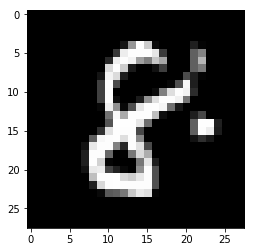

In [14]:
single_pre = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_pre.data, 1)[1].numpy())

## 9.6 Black Box

Prediction :  [2]


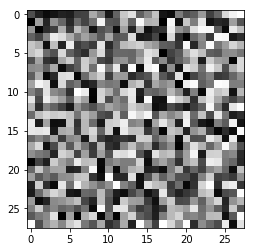

In [15]:
blackbox = Variable(torch.rand(X_single_data.size()))
blackbox_pre = model(blackbox)

plt.imshow(blackbox.data.view(28,28).numpy(), cmap='gray')

print('Prediction : ', torch.max(blackbox_pre.data, 1)[1].numpy())